In [102]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [103]:
from matplotlib import pyplot as plt
import seaborn as sns

In [104]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [105]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [106]:
women = train_data.loc[train_data['Sex']=='female']["Survived"]
women_survival_rate = sum(women)/len(women)

print("% of women that survived = {} ".format(women_survival_rate))

% of women that survived = 0.7420382165605095 


In [107]:
men = train_data.loc[train_data['Sex']=='male']["Survived"]
men
men_survival_rate = sum(men)/len(men)

print("% of men that survived = {} ".format(men_survival_rate))

% of men that survived = 0.18890814558058924 


## **Data Exploration**

In [108]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 891 rows(passengers), 11 features and 1 target variable('Survived')
Data Types:
Float
Integer
objects

In [109]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Age contains missing values
An average of 38% of the training set survived
Age ranges from 0.42 to 80

In [110]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [111]:
total = train_data.isnull().sum().sort_values(ascending=False)
total

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [112]:
percent_1 = train_data.isnull().sum()/train_data.isnull().count()*100
percent_2 = round(percent_1,1).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total Missing Values', '% missing'])
missing_data

,Total Missing Values,% missing
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


May have to drop 'Cabin' feature: too many missing values
'Embarked' only two missing values, can be filled

### Age

Text(0.5, 1.0, 'Male')

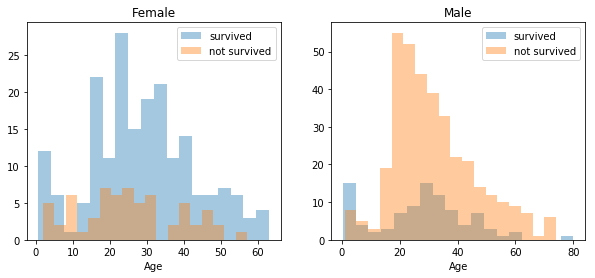

In [113]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
women = train_data[train_data['Sex']=='female']
#women2 = train_data.loc[train_data['Sex']=='female'] Same result 
men = train_data[train_data['Sex']=='male']

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins = 18, label = survived, ax = axes[0], kde = False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins = 18, label = not_survived, ax = axes[0], kde = False)
ax.legend()
ax.set_title("Female")

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins = 18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins = 18, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title("Male")



Infants (Both male and female) have a high probability of survival
Men aged 20 to 30 have highest chance of survival
Women aged around 16 to 40 have higher chance of survival 

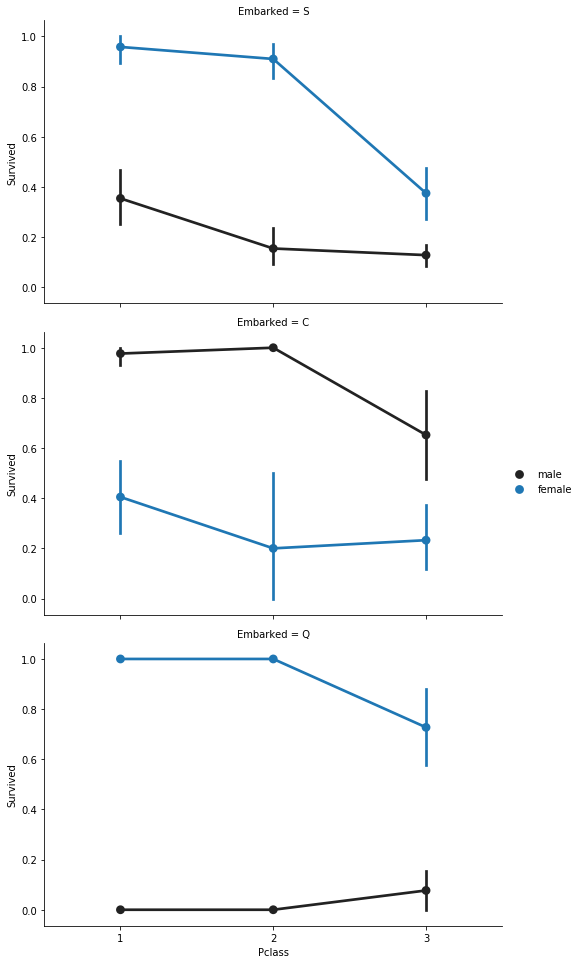

In [114]:
FacetGrid = sns.FacetGrid(train_data, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

Women who embarked from ports Q and S seem to have higher chance of survival than men. Men from port C have higher chance of survival than the women of that port. 

Pclass 3 seems to have lowest chance of survival

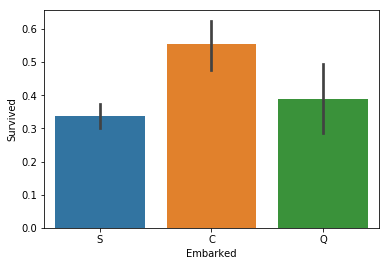

In [115]:
sns.barplot(x='Embarked', y='Survived', data=train_data)

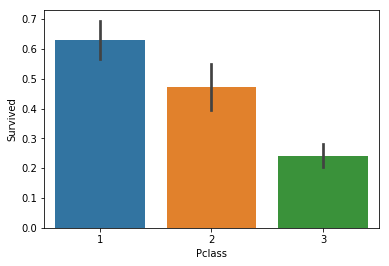

In [116]:
sns.barplot(x='Pclass', y='Survived', data=train_data)

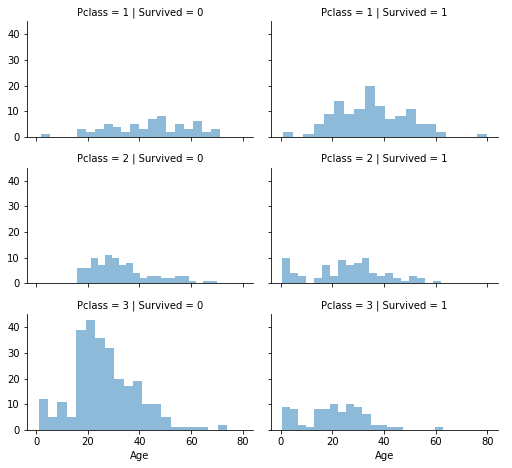

In [117]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Shows that Pclass 3 has low survival rate. Pclass 1 has high survival rate

In [118]:
data = [train_data, test_data]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_data['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

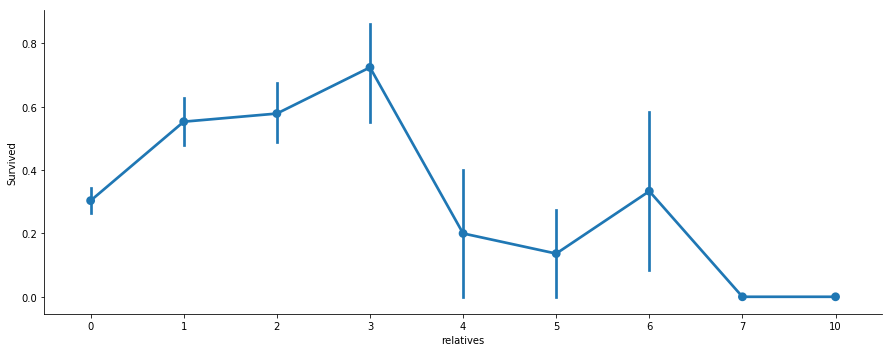

In [119]:
axes = sns.factorplot('relatives','Survived', 
                      data=train_data, aspect = 2.5, )

Passengers with 1 to 3 relatives had the highest probability of survival

## Data Preprocessing

In [120]:
# Drop PassengerId from the Training Set
train_data = train_data.drop(['PassengerId'], axis=1)

### Fill Missing Values
#### Embarked

In [121]:
# Fill embarked - 2 missing values
# Since just two values, fill with the most common value

train_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [122]:
data = [train_data,test_data]
print(train_data.shape)
print(test_data.shape)

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

train_data['Embarked'].isnull().sum()

(891, 13)
(418, 13)


0

#### Age

In [123]:
data = [train_data,test_data]
for dataset in data:
    dataset['Age'] = dataset['Age'].interpolate()

train_data['Age'].isnull().sum()

0

#### Cabin
The first letter of the cabin number is used to identify the deck

In [124]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_data, test_data]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0") #Fill empty fields with U0
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group()) #Identify the first letter
    dataset['Deck'] = dataset['Deck'].map(deck) #map is used to convert the letters defined in deck to numbers
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)


In [125]:
#Demonstrating how the .map(lambda... works. 
dd = pd.concat([train_data['Cabin'], train_data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())], axis=1, keys=['Cabin Value', 'Deck'])
dd

,Cabin Value,Deck
0,U0,U
1,C85,C
2,U0,U
3,C123,C
4,U0,U
...,...,...
886,U0,U
887,B42,B
888,U0,U
889,C148,C


In [126]:
# we can now drop the cabin feature
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

In [127]:
genders = {"male":0, "female":1}
data = [train_data, test_data]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [128]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0,1,8


In [129]:
train_data_no_encoding = train_data.copy()
test_data_no_encoding = test_data.copy()

In [130]:
train_data['train']=1
test_data['train']=0

combined = pd.concat([train_data,test_data])
combined

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,Age,Deck,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,not_alone,relatives,train
0,22.0,8,S,7.2500,"Braund, Mr. Owen Harris",0,NaN,3,0,1,0.0,A/5 21171,0,1,1
1,38.0,3,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,NaN,1,1,1,1.0,PC 17599,0,1,1
2,26.0,8,S,7.9250,"Heikkinen, Miss. Laina",0,NaN,3,1,0,1.0,STON/O2. 3101282,1,0,1
3,35.0,3,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,NaN,1,1,1,1.0,113803,0,1,1
4,35.0,8,S,8.0500,"Allen, Mr. William Henry",0,NaN,3,0,0,0.0,373450,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,33.5,8,S,8.0500,"Spector, Mr. Woolf",0,1305.0,3,0,0,NaN,A.5. 3236,1,0,0
414,39.0,3,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306.0,1,1,0,NaN,PC 17758,1,0,0
415,38.5,8,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307.0,3,0,0,NaN,SOTON/O.Q. 3101262,1,0,0
416,38.5,8,S,8.0500,"Ware, Mr. Frederick",0,1308.0,3,0,0,NaN,359309,1,0,0


In [131]:
print(train_data_no_encoding.shape)
print(train_data.shape)

(891, 13)
(891, 14)


In [132]:
train_data_no_encoding

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,S,0,1,8
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S,0,1,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,22.5,1,2,W./C. 6607,23.4500,S,3,0,8
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C,0,1,3


In [133]:
cols = ['Pclass','Sex','Embarked','Deck','not_alone']
#pd.get_dummies(train_data, columns=cols)
for col in cols:
    dummy_var = pd.get_dummies(combined[col])
    combined  = pd.concat([combined,dummy_var], axis=1)
    combined = combined.drop([col], axis=1)
    
combined

,Age,Fare,Name,Parch,PassengerId,SibSp,Survived,Ticket,relatives,train,...,1,2,3,4,5,6,7,8,0,1
0,22.0,7.2500,"Braund, Mr. Owen Harris",0,NaN,1,0.0,A/5 21171,1,1,...,0,0,0,0,0,0,0,1,1,0
1,38.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,NaN,1,1.0,PC 17599,1,1,...,0,0,1,0,0,0,0,0,1,0
2,26.0,7.9250,"Heikkinen, Miss. Laina",0,NaN,0,1.0,STON/O2. 3101282,0,1,...,0,0,0,0,0,0,0,1,0,1
3,35.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,NaN,1,1.0,113803,1,1,...,0,0,1,0,0,0,0,0,1,0
4,35.0,8.0500,"Allen, Mr. William Henry",0,NaN,0,0.0,373450,0,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,33.5,8.0500,"Spector, Mr. Woolf",0,1305.0,0,NaN,A.5. 3236,0,0,...,0,0,0,0,0,0,0,1,0,1
414,39.0,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306.0,0,NaN,PC 17758,0,0,...,0,0,1,0,0,0,0,0,0,1
415,38.5,7.2500,"Saether, Mr. Simon Sivertsen",0,1307.0,0,NaN,SOTON/O.Q. 3101262,0,0,...,0,0,0,0,0,0,0,1,0,1
416,38.5,8.0500,"Ware, Mr. Frederick",0,1308.0,0,NaN,359309,0,0,...,0,0,0,0,0,0,0,1,0,1


In [134]:
df_train = combined[combined['train']==1]
df_test = combined[combined['train']==0]

#Verify same number of columns
print(df_train.shape)
print(df_test.shape)

#Verify that the train and test rows did not get mixed up
print(df_train['train'].unique())
print(df_test['train'].unique())

#Drop the train column
df_train.drop(['train'], axis=1, inplace=True)
df_test.drop(['train'], axis=1, inplace=True)

print(df_train.shape)
print(df_test.shape)

(891, 29)
(418, 29)
[1]
[0]
(891, 28)
(418, 28)


In [135]:
#### Alternate way of combining one hot encoding #####
#train_one_hot_encoding_df = pd.concat(dummies_train, axis=1)
#test_one_hot_encoding_df = pd.concat(dummies_test, axis=1)

#print(train_one_hot_encoding_df.shape)
#print(test_one_hot_encoding_df.shape)

#final_train, final_test = train_one_hot_encoding_df.align(test_one_hot_encoding_df,
#                                                                    join='left', 
#                                                                    axis=1)

In [136]:
#train_one_hot_encoding_df.info()

## Building Models

In [137]:
#Drop unnecessary variables
df_train = df_train.drop(['Name', 'Ticket', 'PassengerId'], axis = 1)
df_test = df_test.drop(['Name', 'Ticket'], axis = 1)

df_train_no_encode = train_data_no_encoding.drop(['Name', 'Ticket'], axis = 1)
df_test_no_encode = test_data_no_encoding.drop(['Name', 'Ticket'], axis = 1)

In [138]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]

X_train_no_encode = df_train_no_encode.drop("Survived", axis=1)
Y_train_no_encode = df_train_no_encode["Survived"]

In [139]:

from sklearn.ensemble import RandomForestClassifier

In [140]:
X_train.head()

,Age,Fare,Parch,SibSp,relatives,1,2,3,0,1,...,1,2,3,4,5,6,7,8,0,1
0,22.0,7.2500,0,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,1,1,0
1,38.0,71.2833,0,1,1,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,26.0,7.9250,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
3,35.0,53.1000,0,1,1,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,35.0,8.0500,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,1


#### Logistic Regression

In [141]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


81.82

#### K Nearest Neighbor

In [142]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)  
#Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

82.49

#### Random Forest

In [145]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

#Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

99.21

#### Perceptron

In [146]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron(max_iter=100)
perceptron.fit(X_train, Y_train)

#Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

77.44

### Train Error Summary

In [147]:
train_acc = pd.DataFrame({'Method':['Logistic Regression', 'K Nearest Neighbor', 'Random Forest', 'Perceptron'],'score':[acc_log,acc_knn,acc_random_forest, acc_perceptron]})
sorted_train_acc = train_acc.sort_values(by="score", ascending=False)

In [148]:
sorted_train_acc

,Method,score
2,Random Forest,99.21
1,K Nearest Neighbor,82.49
0,Logistic Regression,81.82
3,Perceptron,77.44


In [149]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.8        0.75555556 0.76404494 0.83146067 0.83146067 0.83146067
 0.79775281 0.74157303 0.82022472 0.86363636]
Mean: 0.8037169447281807
Standard Deviation: 0.037385326370329784


In [150]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(20)

,importance
feature,
Age,0.257
Fare,0.195
0,0.143
1,0.119
3,0.042
relatives,0.038
8,0.034
SibSp,0.025
Parch,0.024


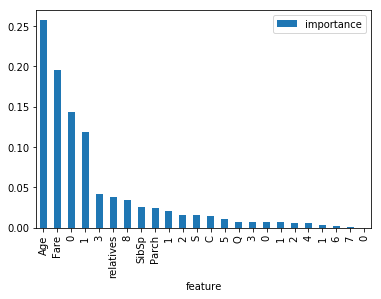

In [151]:
importances.plot.bar()